project brief

# --------------------------------- House Grade Classification -------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv(r"C:\Users\nikhi\Downloads\DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")

In [3]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
df.tail()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B
2999,3000,343,7,6,6,8,NO,0,108,5,95,3,4105,C


##### Data exploration

In [5]:
df.shape

(3000, 14)

In [6]:
df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [7]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [9]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [10]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

no missing value

##### apply label encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

obj=df.select_dtypes(include="object")

for col in obj:
    df[col]=le.fit_transform(df[col])

In [12]:
df.sample(4)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2205,2206,322,8,5,5,6,1,89,75,4,47,2,4393,2
2357,2358,328,5,4,3,4,0,0,72,2,90,5,3107,3
2226,2227,350,7,6,6,8,0,0,84,3,88,4,3663,2
2527,2528,359,6,3,2,4,0,0,118,3,76,5,3716,3


In [13]:
#finding correlation
df.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [14]:
new=df.iloc[:,[2,3,4,5,9,12,13]]
new

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade
0,6,5,4,6,2,3481,3
1,5,4,3,4,3,3510,3
2,7,5,4,5,5,3748,2
3,6,4,3,5,2,3134,3
4,7,4,4,5,3,3843,3
...,...,...,...,...,...,...,...
2995,9,6,5,7,5,4246,1
2996,9,8,7,8,7,3753,0
2997,7,4,3,5,5,3607,3
2998,9,7,7,8,7,4198,1


 - these are the features who are highly corelated to the target variable

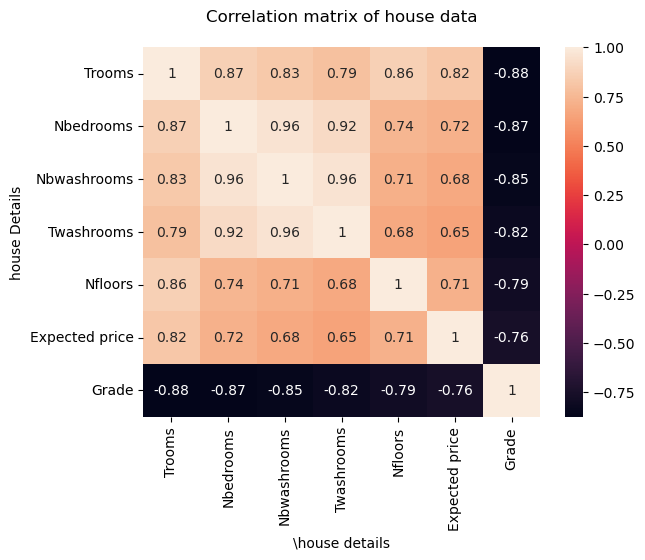

In [15]:
import seaborn as sns
hm=sns.heatmap(new.corr(),annot=True)
hm.set(xlabel="\house details",ylabel="house Details",title="Correlation matrix of house data\n")
plt.show()

#### splitting into train test split

In [16]:
X=df.drop(columns=["Grade","Id"])
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481
1,358,5,4,3,4,1,71,96,3,72,4,3510
2,324,7,5,4,5,1,101,117,5,64,3,3748
3,330,6,4,3,5,1,101,82,2,59,2,3134
4,320,7,4,4,5,0,0,75,3,40,1,3843
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246
2996,292,9,8,7,8,1,116,87,7,97,4,3753
2997,328,7,4,3,5,0,0,78,5,95,6,3607
2998,293,9,7,7,8,0,0,78,7,51,3,4198


In [17]:
y=new[["Grade"]]
y

,Grade
0,3
1,3
2,2
3,3
4,3
...,...
2995,1
2996,0
2997,3
2998,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [20]:
#scaling

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## 1.Decison tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [23]:
dt=DecisionTreeClassifier()

model_d=dt.fit(X_train,y_train)

In [24]:
y_pred=model_d.predict(X_test)

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[ 50  11   0   0   0]
 [ 12  85  14   0   0]
 [  0  11 116  15   0]
 [  0   0  21 240   5]
 [  0   0   0  12   8]]


In [26]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1-score",f1_score(y_test,y_pred,average="weighted"))
print("precision",precision_score(y_test,y_pred,average="weighted"))
print("recall score",recall_score(y_test,y_pred,average="weighted"))
print("Training score : ",model_d.score(X_train,y_train))
print("Testing score : ",model_d.score(X_test,y_test))



accuracy 0.8316666666666667
f1-score 0.8297277955030337
precision 0.8297767118316407
recall score 0.8316666666666667
Training score :  1.0
Testing score :  0.8316666666666667


# 2. Naive Bayes classifier

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred=model.predict(X_test)

In [30]:
#confusion matrix

print(confusion_matrix(y_test,y_pred))

[[ 53   8   0   0   0]
 [  6  96   9   0   0]
 [  0  27  99  16   0]
 [  0   0  30 226  10]
 [  0   0   0   8  12]]


In [31]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1-score",f1_score(y_test,y_pred,average="weighted"))
print("precision",precision_score(y_test,y_pred,average="weighted"))
print("recall score",recall_score(y_test,y_pred,average="weighted"))
print("Training score : ",model.score(X_train,y_train))
print("Testing score : ",model.score(X_test,y_test))



accuracy 0.81
f1-score 0.8113334301944238
precision 0.8156379629105924
recall score 0.81
Training score :  0.7995833333333333
Testing score :  0.81


### 3.Bagging with random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
#define the model
model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=model_rf.predict(X_test)

In [35]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1-score",f1_score(y_test,y_pred,average="weighted"))
print("precision",precision_score(y_test,y_pred,average="weighted"))
print("recall score",recall_score(y_test,y_pred,average="weighted"))
print("Training score : ",model_rf.score(X_train,y_train))
print("Testing score : ",model_rf.score(X_test,y_test))




accuracy 0.8966666666666666
f1-score 0.8929507090675586
precision 0.898832637509513
recall score 0.8966666666666666
Training score :  1.0
Testing score :  0.8966666666666666


## Boosting with Ada boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
model_ada = AdaBoostClassifier()

model_ada.fit(X_train,y_train)

y_pred=model_ada.predict(X_test)

In [38]:
#confusion matrix

print(confusion_matrix(y_test,y_pred))

[[  0  61   0   0   0]
 [  0 104   7   0   0]
 [  0  29  58  55   0]
 [  0   0   4 202  60]
 [  0   0   0   7  13]]


In [39]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1-score",f1_score(y_test,y_pred,average="weighted"))
print("precision",precision_score(y_test,y_pred,average="weighted"))
print("recall score",recall_score(y_test,y_pred,average="weighted"))
print("Training score : ",model_ada.score(X_train,y_train))
print("Testing score : ",model_ada.score(X_test,y_test))




accuracy 0.6283333333333333
f1-score 0.6035306222784066
precision 0.643265700576124
recall score 0.6283333333333333
Training score :  0.5779166666666666
Testing score :  0.6283333333333333


# Stacking

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier 

In [41]:
# get a stacking ensemble of models
def get_stacking():
    #define base models
    level0=list()
    level0.append(("lr",LogisticRegression()))
    level0.append(("knn",KNeighborsClassifier()))
    level0.append(("DT",DecisionTreeClassifier()))
    level0.append(("svc",SVC()))
    level0.append(("naive",GaussianNB()))
    
    # define meta learner model
    level1 = LogisticRegression()
    
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [42]:
model=get_stacking()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [43]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 57   4   0   0   0]
 [  2 105   4   0   0]
 [  0   5 128   9   0]
 [  0   0   2 264   0]
 [  0   0   0   8  12]]


In [44]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1-score",f1_score(y_test,y_pred,average="weighted"))
print("precision",precision_score(y_test,y_pred,average="weighted"))
print("recall score",recall_score(y_test,y_pred,average="weighted"))
print("Training score : ",model.score(X_train,y_train))
print("Testing score : ",model.score(X_test,y_test))



accuracy 0.9433333333333334
f1-score 0.9417010946842239
precision 0.9445305164157973
recall score 0.9433333333333334
Training score :  0.9783333333333334
Testing score :  0.9433333333333334


##### identify  the best model

 - interpretation: out of all the models Stacking are best of all having accuracy is 94%  and f1 score,precision are quite good and model is low variance and biased

In [4]:
df["Grade"].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

#### Business interpretation:  From the visualisation in tableau we can conclude that the Grade A house giving all the qualities the average rooms , areas and washrooms are maximum in Grade A house, but majority of masses are using Grade D houses ie 1270 and 399 people are using Grade A houses because, A houses are expensive and not everybody afford that, so if we want to make our business profitable we have to invest on Grade D houses and we have to focus on Grade D houses more